In [224]:
import cv2
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided


In [215]:
# 마우스로 클릭하여 점 만드는 함수

def mouse_handler(event, x, y, flasgs, data):
    if  event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 클릭
        cv2.circle(data['im'], (x, y), 3, (0, 0, 255), -1)
        cv2.imshow('image', data['im'])
        if len(data['points']) < 4:
            data['points'].append((y, x))

# 네 개의 좌표를 찍는 함수
def get_four_points(im):
    data = {}
    data['im'] = im.copy()
    data['points'] = []

    cv2.imshow('image', im)
    cv2.setMouseCallback('image', mouse_handler, data)
    cv2.waitKey()
    cv2.destroyAllWindows()
    points = data['points']
    # 마우스로 찍은 점을 float으로 바꿔줘야한다.
    #points = np.array(data['points'], dtype=float)

    return points

In [216]:
img_src = cv2.imread('C:/Users/USER/Documents/computer_vision/1st.jpg')
res = cv2.resize(img_src, dsize=(378, 504), interpolation=cv2.INTER_CUBIC) # 이미지 resize
points_src = get_four_points(res) # 각각의 클릭한 point

print(points_src)

[(93, 169), (239, 19), (455, 219), (303, 372)]


In [426]:
#sobel filter
convX=np.zeros((3,3),np.double)
convX[0,0]=-1; convX[0,1]=0; convX[0,2]=1; convX[1,0]=-2; convX[1,1]=0
convX[1,2]=2; convX[2,0]=-1; convX[2,1]=0; convX[2,2]=1

convY=np.zeros((3,3),np.double)
convY[0,0]=-1; convY[0,1]=-2; convY[0,2]=-1; convY[1,0]=0; convY[1,1]=0
convY[1,2]=0; convY[2,0]=1; convY[2,1]=2; convY[2,2]=1

In [268]:
# 이미지 gary 변형
res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

In [393]:
h, w = 9, 9
imgContoursX = []
imgContoursY = []
contours_a=[]
contours_b=[]
contours = []

for i in range(points_src[0][0] - 4, points_src[0][0] + 4 + 1):
    for j in range(points_src[0][1] -4, points_src[0][1] + 4 + 1):
        imgContoursX.append(np.sum(np.multiply(convX, res_gray[i-1 : i+2, j-1 : j+2])))
        imgContoursY.append(np.sum(np.multiply(convY, res_gray[i-1 : i+2, j-1 : j+2])))

imgContoursX = np.array(imgContoursX).reshape(9,9).T
imgContoursY = np.array(imgContoursX).reshape(9,9).T

imgContours = np.sqrt(imgContoursX ** 2 + imgContoursY ** 2)

tmp = 0
for a in range(imgContours.shape[0]):
    for b in range(imgContours.shape[1]):
        if imgContours[a][b] < 30:
            imgContours[a][b] = 0
        else:
            contours.append([a, b])
            contours_a.append(a)
            contours_b.append(b)

In [407]:
angles = (np.arctan2(imgContoursX, imgContoursY) + np.pi) * 180/np.pi


In [409]:
angle_list = []
for i in range(len(contours_a)):
    angle = angles[contours_a[i]][contours_b[i]]
    angle_list.append(angle)

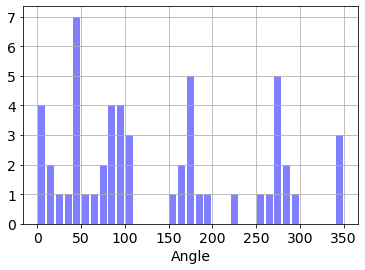

In [425]:
bin = np.arange(0, 360, 10)
hist, bin_edges = np.histogram(angle_list, bin)
q = np.sum(hist)

plt.hist(angle_list, bin, rwidth=0.8, color='blue', alpha=0.5)
plt.grid()
plt.xlabel('Angle', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [371]:
def anglesStringsArray():
    angle_string = []
    for angle in range(0, 360, 10):
        angle_string.append(angle)
    return angle_string

In [373]:
angle_string = []
for angle in range(0, 360, 10):
    angle_string.append(angle)


In [ ]:
def roundAngleTitle(angle):
    anglesStrings = anglesStringsArray()
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return anglesStrings[a]

In [347]:
def anglesArray():
    angles = []
    i=0
    while True:
        angles.append(math.pi*i)
        i+=1/4
        if(i==2):
            break
    return angles

In [351]:
def roundAngle(angle):
    angles = anglesArray()
    index=np.argmin(np.abs(np.subtract(angles,angle)))
    angles = anglesArray()
    a=angles[index]
    return a

In [350]:
def roundAngleTitle(angle):
    anglesStrings = anglesStringsArray()
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return anglesStrings[a]

In [352]:
roundAngle(d)

ValueError: operands could not be broadcast together with shapes (8,) (9,9) 

In [342]:
def getOrientation(img,x,y):
    global imgContoursX,imgContoursY
    if(x<0 or x>w-1 or y<0 or y>h-1):
        d=0
    else:
        d=math.atan2(imgContoursY[y][x],imgContoursX[y][x])
    d+=math.pi
    return d

def getBlock(img,x,y):
    a=[]
    block=np.zeros((16,16),np.double)
    for i in range(x-8,x+8):
        for j in range(y-8,y+8):
            angle=roundAngle(getOrientation(img,i,j))
            block[j-y+8][i-x+8]=angle
    # block=np.zeros((4,4),np.double)
    # for i in range(x-8,x+8):
    #     for j in range(y-8,y+8):
    #         xb=(i-x+8)//4
    #         yb=(j-y+8)//4
    #         angle=roundAngle(getOrientation(img,i,j))
    #         block[yb][xb]=max(block[yb][xb],angle)
    #         a.append(angle)
    return block


def anglesArray():
    angles = []
    i=0
    while True:
        angles.append(math.pi*i)
        i+=1/4
        if(i==2):
            break
    return angles

def anglesStringsArray():
    return ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4"]

def roundAngle(angle):
    angles = anglesArray()
    index=np.argmin(np.abs(np.subtract(angles,angle)))
    angles = anglesArray()
    a=angles[index]
    return a

def roundAngleTitle(angle):
    anglesStrings = anglesStringsArray()
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return anglesStrings[a]

def roundAngleIndex(angle):
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return a

def showHist(tempdicArray):
    fig, ax = plt.subplots(4,4,figsize=(14,8))
    for i in range (0,len(tempdicArray)): 
        x=(int)(i/4)
        ax[x][i%4].bar(list(tempdicArray[i].keys()), tempdicArray[i].values(), color='b')
    fig.tight_layout()
    plt.show()


In [ ]:
blocks=getBlock(img,11,11)
dic={}
histogrammes=[]
for block in blocks:
    #count orientations for histogramme
    array=np.matrix.flatten(block)
    count=Counter(array)
    for c in count:
        dic[roundAngleTitle(c)]=count[c]
    histogrammes.append(dic.copy())
    dic={}

showHist(histogrammes)

cv2.imshow('image : '+s, img)
cv2.waitKey(0)

In [203]:
def getContours(img,seuil=30):
    contours=[]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = np.shape(img)
    imgContours=np.zeros((h,w),np.double)
    imgContoursX=np.zeros((h,w),np.double)
    imgContoursY=np.zeros((h,w),np.double)
    for i in range(0,h):
        for j in range (0,w):
            if(j==0 or j==w-1 or i==0 or i==h-1):
                imgContoursX[i][j]=0
                imgContoursY[i][j]=0
            else:
                imgContoursX[i][j] = (np.multiply( convX,img[i-1:i+2,j-1:j+2]).sum(axis=1).sum(axis=0))
                imgContoursY[i][j] = (np.multiply( convY,img[i-1:i+2,j-1:j+2]).sum(axis=1).sum(axis=0))
            a=math.sqrt(math.pow(imgContoursX[i][j],2)+math.pow(imgContoursY[i][j],2))
            a=min(a,255)
            a=max(a,0)
            if(a>seuil):
                imgContours[i][j]=a
                contours.append([i,j])
    return imgContours,contours,imgContoursX,imgContoursY

In [204]:
img_1 = np.ones((3,3))
np.sum(np.multiply(convX, img_1))

0.0

In [114]:
res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
gx_ = cv2.Sobel(res_gray, cv2.CV_32F, 1, 0, ksize=1)
gy_ = cv2.Sobel(res_gray, cv2.CV_32F, 0, 1, ksize=1)

gx = cv2.normalize(gx_, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
gy = cv2.normalize(gy_, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2.imshow('image', gx)
cv2.waitKey()
cv2.destroyAllWindows()

In [67]:
print(res_gray[239, 14])
print(res_gray[239, 15])
print(res_gray[239, 16])

140
140
136


In [65]:
gx[239, 15]

124

In [121]:
len(img_patch_1)

121

In [122]:
#필터(그래디언트)를 적용한 후 해당 픽셀의 그래디언트 값 출력
def contour(img_patch):
    contour_list_x = []
    for pixel_x in img_patch:
        pixel_x = tuple(pixel_x)
        contour_list_x.append(gx[pixel_x])
    contour_list_y = []
    for pixel_y in img_patch:
        pixel_y = tuple(pixel_y)
        contour_list_y.append(gy[pixel_y])
    return contour_list_x, contour_list_y

In [163]:
contour_list_x, contour_list_y = contour(img_patch_4)
# 그래디언트 값의 magnitude
mag = np.sqrt(np.array(contour_list_x) ** 2 + np.array(contour_list_y) ** 2)
# 그래디언트 값의 orientation
len(contour_list_x)

121

In [164]:
angle_list = []
for i in range(len(img_patch_1)):
    radian = np.arctan2(contour_list_x[i], contour_list_y[i])
    angle = math.degrees(2 * radian)
    angle_list.append(angle)
max(angle_list)

113.5284537422305

In [151]:
angle_list = []
for i in range(len(img_patch_1)):
    angle_list.append((np.arctan2(contour_list_x[i], contour_list_y[i]) + np.pi) * 180/np.pi)
max(angle_list)

244.01012867477166

In [81]:
def angles_array():
    angles = []
    i=0
    while True:
        angles.append(math.pi*i)
        i+=1/4
        if(i==2):
            break
    return angles

In [82]:
def anglesArray():
    angles = []
    i=0
    while True:
        angles.append(math.pi*i)
        i+=1/4
        if(i==2):
            break
    return angles


In [83]:
def anglesStringsArray():
    return ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4"]

In [84]:
def roundAngle(angle):
    angles = anglesArray()
    index=np.argmin(np.abs(np.subtract(angles,angle)))
    angles = anglesArray()
    a=angles[index]
    return a

In [85]:
def roundAngleTitle(angle):
    anglesStrings = anglesStringsArray()
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return anglesStrings[a]

In [86]:
def roundAngleIndex(angle):
    angles = anglesArray()
    a=np.argmin(np.abs(np.subtract(angles,angle)))
    return a

In [87]:
def showHist(tempdicArray):
    fig, ax = plt.subplots(4,4,figsize=(14,8))
    for i in range (0,len(tempdicArray)): 
        x=(int)(i/4)
        ax[x][i%4].bar(list(tempdicArray[i].keys()), tempdicArray[i].values(), color='b')
    fig.tight_layout()
    plt.show()

In [99]:
def drawContours(img,contours,color):
    contours=np.array(contours)
    for i in range(contours.shape[0]):
        for j in range(contours[i].shape[0]):
            for k in range(contours[i][j].shape[0]):
                img[contours[i][j][k][1]][contours[i][j][k][0]]=color

In [100]:
def getContours(img,seuil=30):
    contours=[]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h,w=np.shape(img)
    imgContours=np.zeros((h,w),np.double)
    imgContoursX=np.zeros((h,w),np.double)
    imgContoursY=np.zeros((h,w),np.double)
    for i in range(0,h):
        for j in range (0,w):
            if(j==0 or j==w-1 or i==0 or i==h-1):
                imgContoursX[i][j]=0
                imgContoursY[i][j]=0
            else:
                imgContoursX[i][j] = (np.multiply( convX,img[i-1:i+2,j-1:j+2]).sum(axis=1).sum(axis=0))
                imgContoursY[i][j] = (np.multiply( convY,img[i-1:i+2,j-1:j+2]).sum(axis=1).sum(axis=0))
            a=math.sqrt(math.pow(imgContoursX[i][j],2)+math.pow(imgContoursY[i][j],2))
            a=min(a,255)
            a=max(a,0)
            if(a>seuil):
                imgContours[i][j]=a
                contours.append([i,j])
    return imgContours,contours,imgContoursX,imgContoursY


In [109]:
def getOrientation(img,x,y):
    global imgContoursX,imgContoursY
    if(x<0 or x>w-1 or y<0 or y>h-1):
        d=0
    else:
        d=math.atan2(imgContoursY[y][x],imgContoursX[y][x])
    d+=math.pi
    return d

def getBlock(img,x,y):
    a=[]
    block=np.zeros((16,16),np.double)
    for i in range(x-8,x+8):
        for j in range(y-8,y+8):
            angle=roundAngle(getOrientation(img,i,j))
            block[j-y+8][i-x+8]=angle

    return block

In [102]:
pixelX=200
pixelY=200

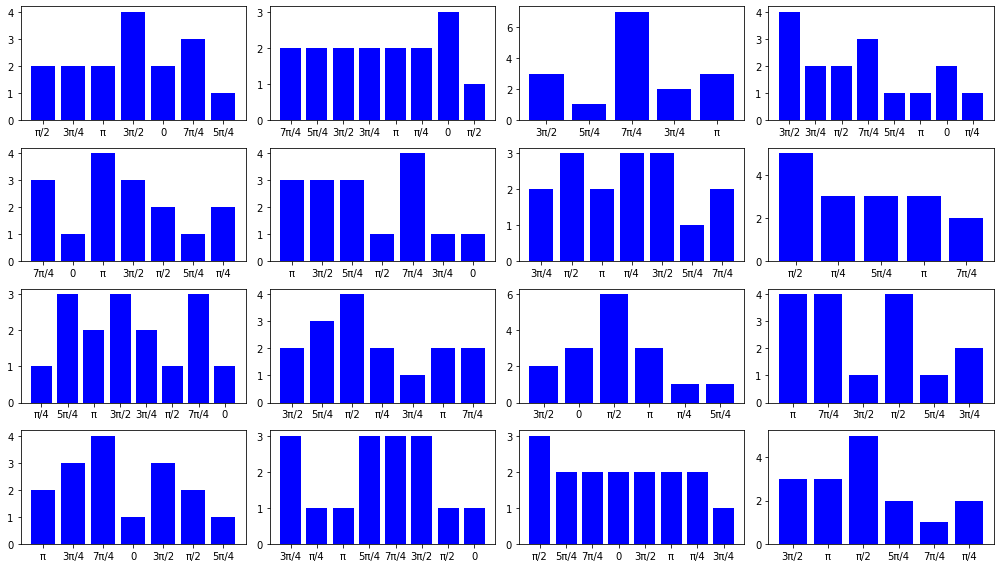

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [108]:
#main
s='C:/Users/USER/Documents/computer_vision/1st.jpg'
img=cv2.imread(s)
img = cv2.resize(img, dsize=(378, 504), interpolation=cv2.INTER_CUBIC) # 이미지 resize

h,w,d = np.shape(img)
#convolution matrix
c=1
convX=np.zeros((3,3),np.double)
convX[0,0]=0;convX[0,1]=0;convX[0,2]=0;convX[1,0]=-c;convX[1,1]=0
convX[1,2]= c;convX[2,0]= -0;convX[2,1]=0;convX[2,2]=0

convY=np.zeros((3,3),np.double)
convY[0,0]=-0;convY[0,1]=-c;convY[0,2]=-0;convY[1,0]=0;convY[1,1]=0
convY[1,2]= 0;convY[2,0]= 0;convY[2,1]=c;convY[2,2]=0

#threshold for contours
seuil=30
img,contours,imgContoursX,imgContoursY=getContours(img,seuil)

blocks=getBlock(img,pixelX,pixelY)
dic={}
histogrammes=[]
for block in blocks:
    #count orientations for histogramme
    array=np.matrix.flatten(block)
    count=Counter(array)
    for c in count:
        dic[roundAngleTitle(c)]=count[c]
    histogrammes.append(dic.copy())
    dic={}

showHist(histogrammes)

cv2.imshow('image : '+img,img)
cv2.waitKey(0)

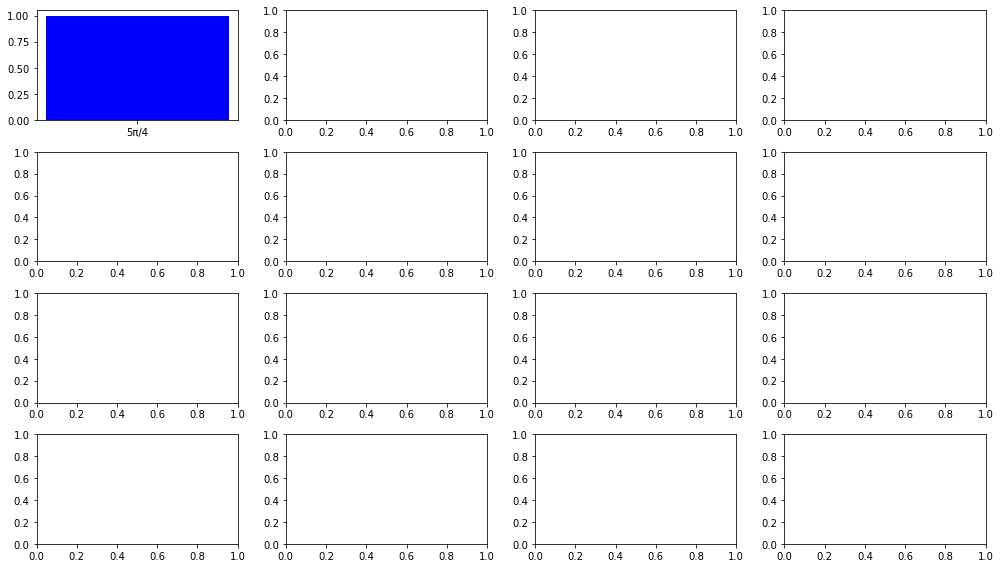

NameError: name 's' is not defined

In [88]:
dic={}
histogrammes=[]
count=Counter(angle_list)
for c in count:
    dic[roundAngleTitle(c)]=count[c]
histogrammes.append(dic.copy())
dic={}

showHist(histogrammes)

cv2.imshow('image : '+s,img)
cv2.waitKey(0)